# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd 
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from tabulate import tabulate

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
online_retail = fetch_ucirepo(id=352) 
df = pd.DataFrame(online_retail.data.features)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# data head
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [5]:
# Jumlah  Data hilang
data_hilang = df.isnull().sum()
print("jumlah data hilang : \n", data_hilang)

jumlah data hilang : 
 Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
#data duplikat
data_duplicated = df.duplicated().sum()
print(f"Jumlah data duplikat: {data_duplicated}")

Jumlah data duplikat: 6007


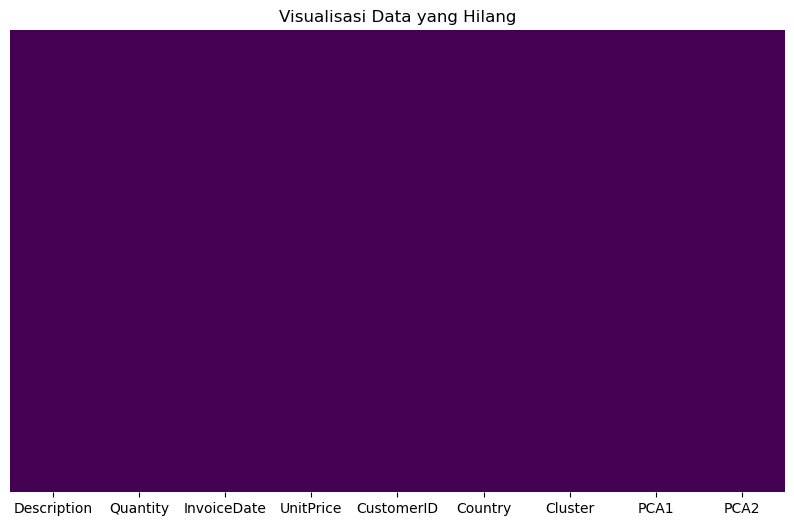

In [38]:
# Visualisasi data yang hilang
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Visualisasi Data yang Hilang")
plt.show()

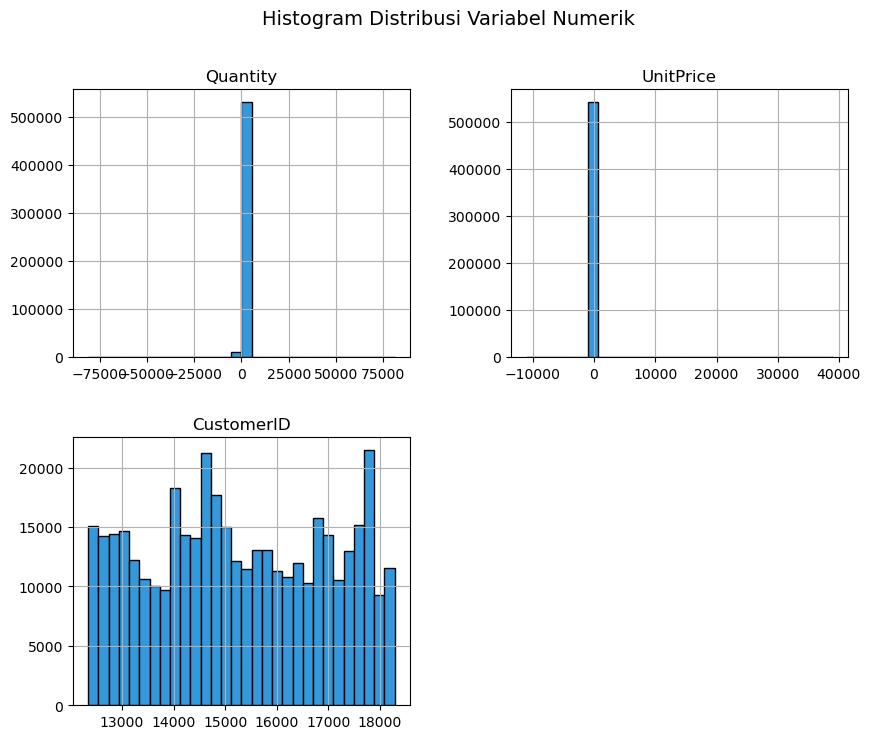

In [8]:
# Histogram untuk variabel numerik
df.hist(figsize=(10, 8), bins=30, color="#3498db", edgecolor="black")
plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=14)
plt.show()


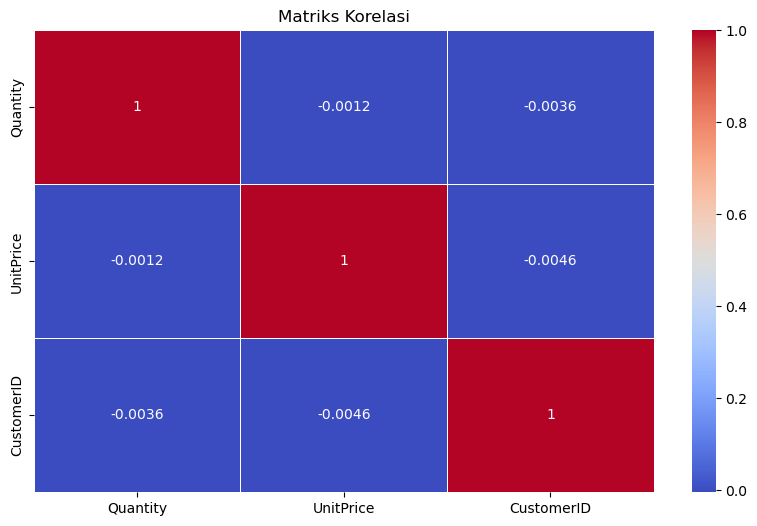

In [9]:
## Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_31164/2318159848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori


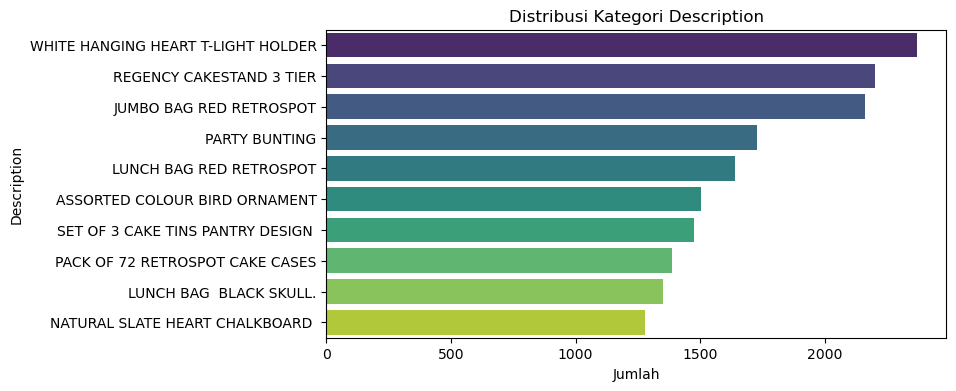

/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_31164/2318159848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori


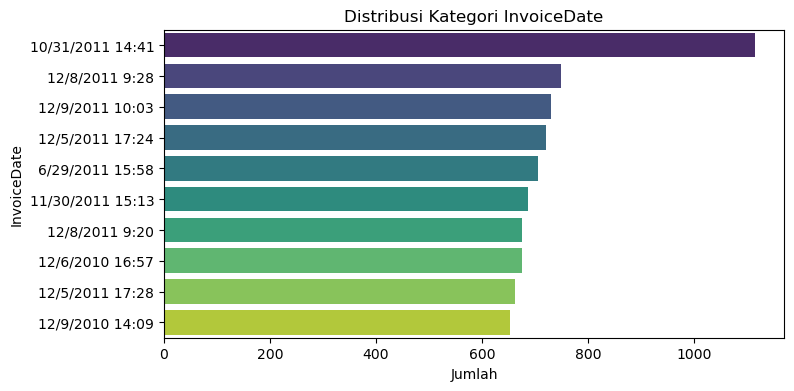

/var/folders/qf/s7f_42996nn6gysrn5cyjq600000gn/T/ipykernel_31164/2318159848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori


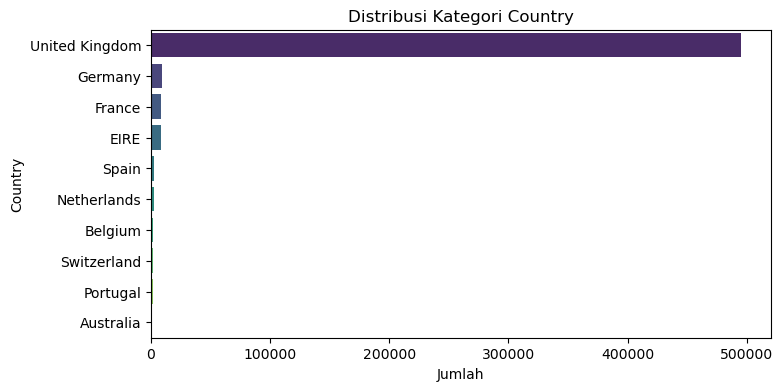

In [10]:
# visulalisasi data kategorikal 
categorical_cols = df.select_dtypes(include=["object"]).columns

if not categorical_cols.empty:
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette="viridis")  # Ambil top 10 kategori
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel("Jumlah")
        plt.ylabel(col)
        plt.show()
else:
    print("Tidak ada kolom kategorikal untuk divisualisasikan.")


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [52]:
# hapus data yg kosong 
numerical_cols = df.select_dtypes(include=["number"]).columns
df = df.dropna(subset=numerical_cols)  

In [13]:
# Hapus data duplikat
df_drop_duplicated = df.drop_duplicates()
# Cek jumlah data setelah dihapus data duplikat
print("Jumlah data setelah dihapus data duplikat: ", len(df_drop_duplicated))

Jumlah data setelah dihapus data duplikat:  401528


In [ ]:
df.fillna(df.mean(), inplace=True)  # Mengisi NaN dengan mean

In [46]:
# Pilih semua kolom numerik
numerical_cols = df.select_dtypes(include=["number"]).columns


# Normalisasi (skala 0-1)
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Simpan hasil normalisasi ke dalam variabel X_scaled
X_scaled = df[numerical_cols].values  


In [ ]:
# Standarisasi data agar memiliki mean=0 dan std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

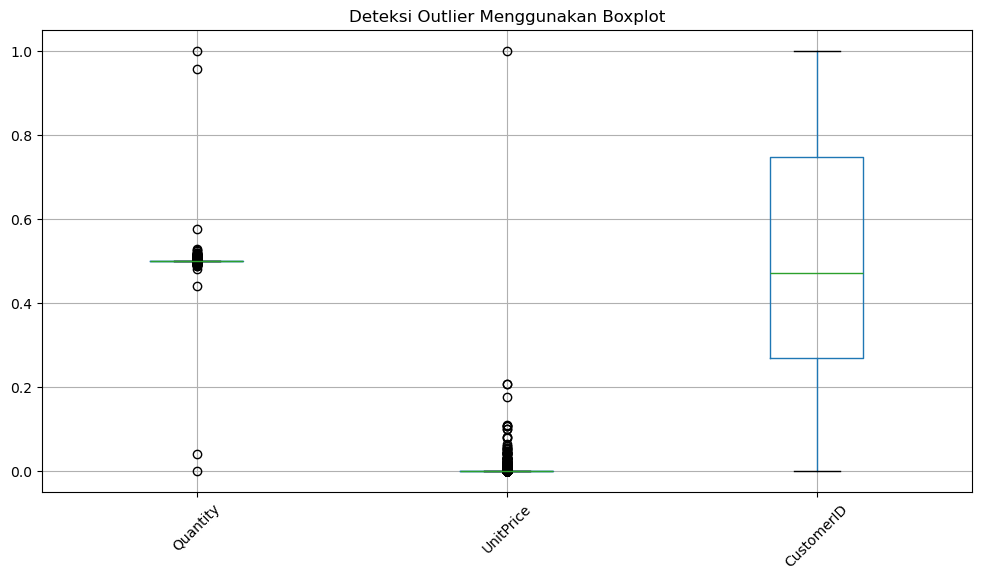

In [47]:
### Mendeteksi Outlier Menggunakan Boxplot

# Pilih semua kolom numerik
numerical_cols = df.select_dtypes(include=["number"]).columns

# Visualisasi boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)  # Rotasi label agar lebih jelas
plt.title("Deteksi Outlier Menggunakan Boxplot")
plt.show()

In [48]:
df_cleaned = df.copy()

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Tentukan batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hapus outlier
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Jumlah data sebelum membersihkan outlier: {df.shape[0]}")
print(f"Jumlah data setelah membersihkan outlier: {df_cleaned.shape[0]}")

Jumlah data sebelum membersihkan outlier: 406829
Jumlah data setelah membersihkan outlier: 343773


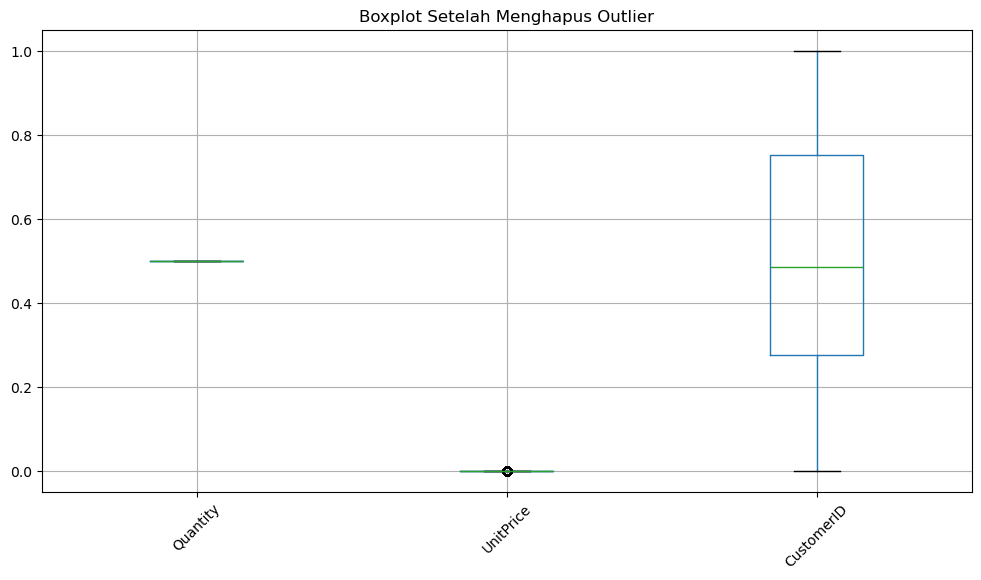

In [49]:
# visualisasi data setelah outlier dihapus
plt.figure(figsize=(12, 6))
df_cleaned[numerical_cols].boxplot(rot=45)
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

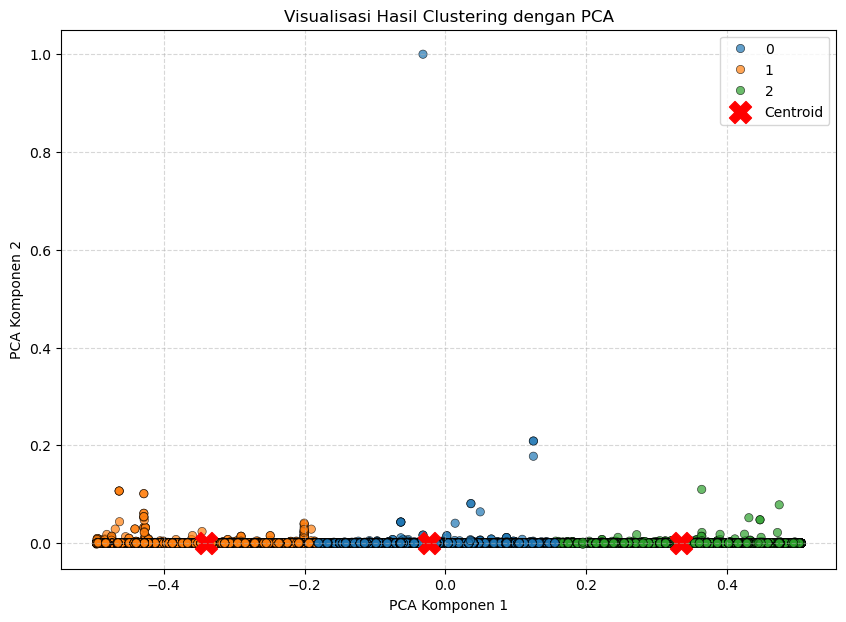

In [59]:
#  jumlah cluster optimal berdasarkan Elbow Method
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
df["Cluster"] = kmeans.fit_predict(X_scaled) 

#  PCA untuk mereduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  hasil PCA ke DataFrame
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))

# Scatter plot dengan warna per cluster
sns.scatterplot(
    x=df["PCA1"], 
    y=df["PCA2"], 
    hue=df["Cluster"], 
    palette="tab10",
    alpha=0.7, 
    edgecolor="black"
)

# centroid cluster
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1], 
    c="red", marker="X", s=250, label="Centroid"
)

plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

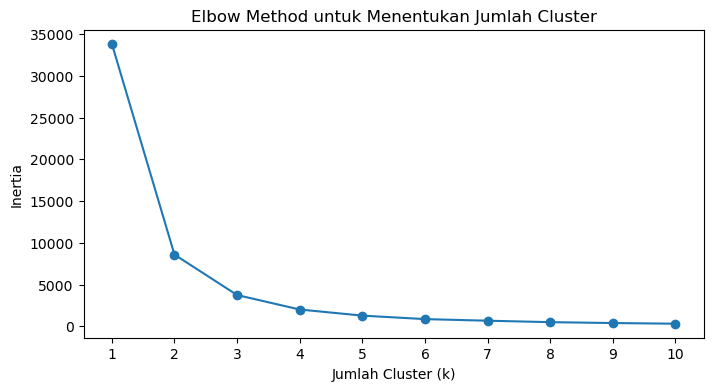

Jumlah cluster optimal berdasarkan Elbow Method: 9


In [55]:
#  Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot hasilnya
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xticks(K_range)
plt.show()

# Menentukan jumlah cluster optimal (titik elbow)
deltas = np.diff(inertia)  # Selisih antar inertia
elbow_point = np.argmin(np.abs(deltas)) + 1  # Cari titik perubahan terbesar

print(f"Jumlah cluster optimal berdasarkan Elbow Method: {elbow_point}")

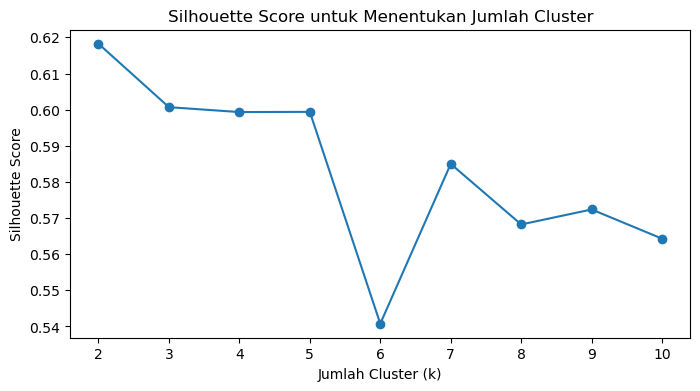

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [65]:

silhouette_scores = []

for k in range(2, 11): 
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10, batch_size=500)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # **Gunakan sampling agar lebih cepat**
    sample_size = min(1000, len(X_scaled))
    sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
    
    score = silhouette_score(X_scaled[sample_indices], cluster_labels[sample_indices])
    silhouette_scores.append(score)

# **Plot Silhouette Score**
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan Jumlah Cluster")
plt.xticks(range(2, 11))
plt.show()

# **Jumlah cluster optimal berdasarkan nilai Silhouette Score tertinggi**
optimal_k_silhouette = range(2, 11)[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k_silhouette}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

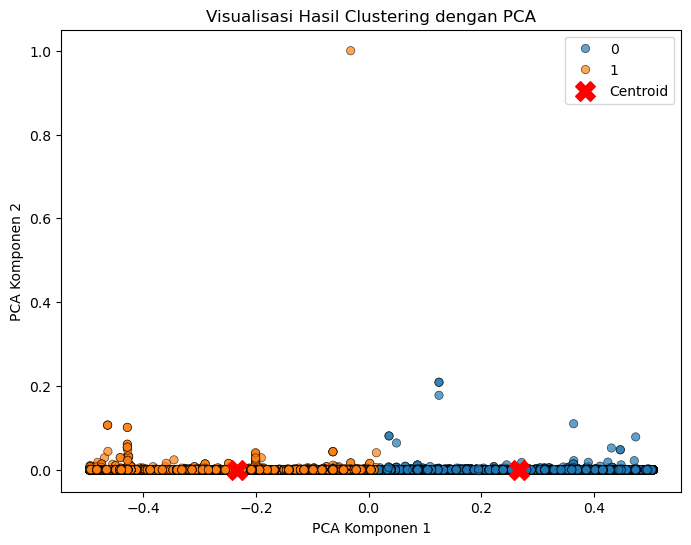

In [66]:

optimal_k = optimal_k_silhouette  # Dari hasil Silhouette Score

# **Latih ulang K-Means dengan jumlah cluster optimal**
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
df["Cluster"] = kmeans.fit_predict(X_scaled)

# **Lakukan PCA untuk mereduksi dimensi ke 2D**
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Gunakan data yang sudah distandardisasi

# **Tambahkan hasil PCA ke DataFrame**
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# **Scatter plot dengan warna per cluster**
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["PCA1"], 
    y=df["PCA2"], 
    hue=df["Cluster"], 
    palette="tab10",  # Gunakan palet warna yang lebih berbeda
    alpha=0.7, 
    edgecolor="black"
)

# **Tambahkan centroid cluster dalam ruang PCA**
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1], 
    c="red", marker="X", s=200, label="Centroid"
)

plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [70]:


label_encoder = LabelEncoder()
df["Country"] = label_encoder.fit_transform(df["Country"].astype(str))  # Encoding fitur 'Country'

# 3️⃣ Normalisasi fitur numerik
scaler = StandardScaler()
df[["Quantity", "UnitPrice", "CustomerID"]] = scaler.fit_transform(df[["Quantity", "UnitPrice", "CustomerID"]])

# 4️⃣ Clustering dengan KMeans
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[["Quantity", "UnitPrice", "CustomerID"]])


df_normalized = df.copy()
df_normalized["Cluster"] = kmeans.labels_ 


df_normalized["Country"] = label_encoder.inverse_transform(df_normalized["Country"])  # Kembalikan Country ke bentuk aslinya
df_normalized[["Quantity", "UnitPrice", "CustomerID"]] = scaler.inverse_transform(df_normalized[["Quantity", "UnitPrice", "CustomerID"]])


df_original[["Country", "Quantity", "UnitPrice", "CustomerID", "Cluster"]] = df_normalized[["Country", "Quantity", "UnitPrice", "CustomerID", "Cluster"]]


df_original.to_csv("hasil_clustering.csv", index=False)

print("Clustering selesai! Data telah dikembalikan ke bentuk aslinya dan disimpan sebagai 'hasil_clustering.csv'.")

Clustering selesai! Data telah dikembalikan ke bentuk aslinya dan disimpan sebagai 'hasil_clustering.csv'.


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [71]:
label_encoder = LabelEncoder()
df["Country"] = label_encoder.fit_transform(df["Country"].astype(str))  # Contoh encoding fitur kategori

scaler = StandardScaler() 
df[["Quantity", "UnitPrice", "CustomerID"]] = scaler.fit_transform(df[["Quantity", "UnitPrice", "CustomerID"]])

optimal_k = 4  # Jumlah cluster optimal yang telah ditentukan sebelumnya
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[["Quantity", "UnitPrice", "CustomerID"]])

df_normalized = df.copy()
df_normalized["Cluster"] = kmeans.labels_  # Tambahkan hasil label cluster


df_normalized[["Quantity", "UnitPrice", "CustomerID"]] = scaler.inverse_transform(df_normalized[["Quantity", "UnitPrice", "CustomerID"]])

df_normalized["Country"] = label_encoder.inverse_transform(df_normalized["Country"])


df_original[["Country", "Quantity", "UnitPrice", "CustomerID", "Cluster"]] = df_normalized[["Country", "Quantity", "UnitPrice", "CustomerID", "Cluster"]]


df_original.to_csv("hasil_clustering_numerik.csv", index=False)

print(" Clustering selesai! Data telah dikembalikan ke bentuk aslinya dan disimpan sebagai 'hasil_clustering.csv'.")

 Clustering selesai! Data telah dikembalikan ke bentuk aslinya dan disimpan sebagai 'hasil_clustering.csv'.


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


===== DISTRIBUSI UKURAN CLUSTER =====

+-----------+---------------+--------------+
| Cluster   |   Jumlah Data | Persentase   |
+===========+===============+==============+
| Cluster 1 |             5 | 100.0%       |
+-----------+---------------+--------------+

===== KARAKTERISTIK STATISTIK PER CLUSTER =====

+-----------+------------------------+--------------------------+-----------------------+-----------------------+-------------------------+-------------------------+---------------------------+------------------------+------------------------+-----------------------------+
|   Cluster |   ('Quantity', 'mean') |   ('Quantity', 'median') |   ('Quantity', 'min') |   ('Quantity', 'max') |   ('Quantity', 'count') |   ('UnitPrice', 'mean') |   ('UnitPrice', 'median') |   ('UnitPrice', 'min') |   ('UnitPrice', 'max') |   ('CustomerID', 'nunique') |
+===========+========================+==========================+=======================+=======================+========================

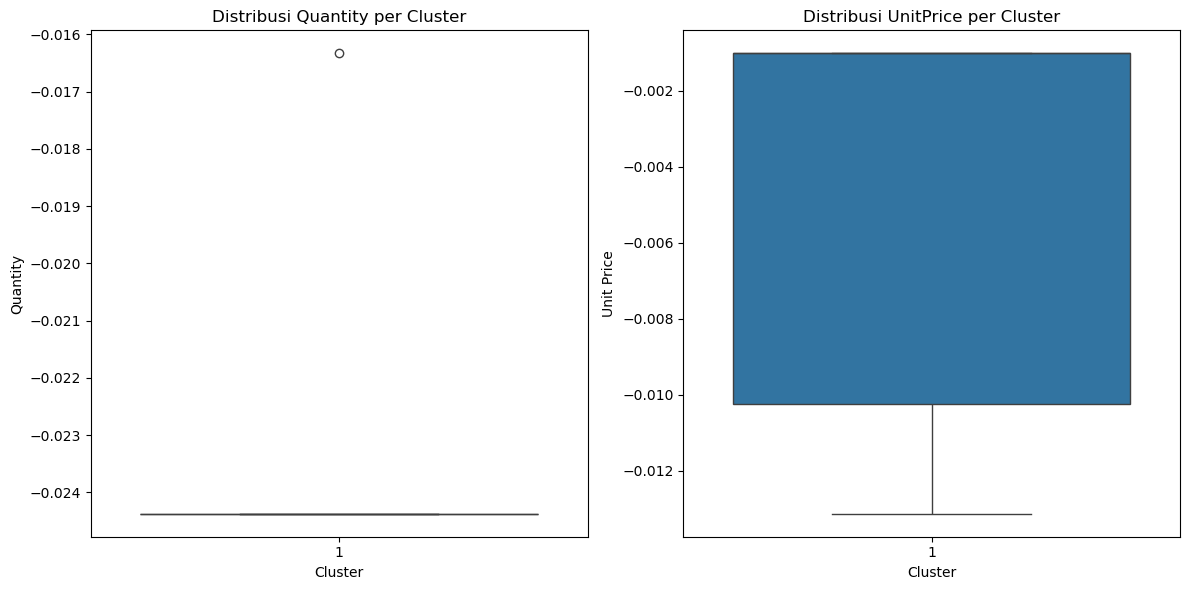


===== INTERPRETASI HASIL CLUSTERING =====


 **Cluster 1:**
- Jumlah data: 5 (100.0%)
- Rata-rata Quantity: -0.02
- Rata-rata Unit Price: -0.01
- Jumlah pelanggan unik: 1

 **Kesimpulan & Rekomendasi:**
- Cluster dengan jumlah data terbanyak mencerminkan pola pembelian yang paling umum.
- Cluster dengan Quantity tinggi dan Unit Price rendah cocok untuk strategi diskon besar.
- Cluster dengan Quantity rendah tapi harga tinggi cocok untuk produk eksklusif atau premium.
- Distribusi pelanggan berdasarkan negara bisa digunakan untuk strategi pemasaran spesifik per wilayah.


In [ ]:

# Load hasil clustering
df_clustered = pd.read_csv("hasil_clustering_numerik.csv")

# Hitung total data dan jumlah cluster yang ada
total_rows = len(df_clustered)
existing_clusters = sorted(df_clustered['Cluster'].unique())

# Hitung jumlah dan persentase tiap cluster
cluster_sizes = df_clustered['Cluster'].value_counts()
cluster_percentages = {k: round((v / total_rows * 100), 2) for k, v in cluster_sizes.items()}

# 1. Distribusi cluster dalam tabel
distribusi_cluster = [[f"Cluster {i}", cluster_sizes[i], f"{cluster_percentages[i]}%"] for i in existing_clusters]
print("\n===== DISTRIBUSI UKURAN CLUSTER =====\n")
print(tabulate(distribusi_cluster, headers=["Cluster", "Jumlah Data", "Persentase"], tablefmt="grid"))

# 2. Analisis statistik per cluster
cluster_analysis = df_clustered.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'min', 'max', 'count'],
    'UnitPrice': ['mean', 'median', 'min', 'max'],
    'CustomerID': ['nunique']
}).round(2)

print("\n===== KARAKTERISTIK STATISTIK PER CLUSTER =====\n")
print(tabulate(cluster_analysis, headers="keys", tablefmt="grid"))

# 3. Distribusi negara per cluster (persentase)
country_distribution = pd.crosstab(df_clustered['Cluster'], df_clustered['Country'], normalize='index') * 100
country_distribution = country_distribution.round(2)

print("\n===== DISTRIBUSI NEGARA PER CLUSTER (%) =====\n")
print(tabulate(country_distribution, headers="keys", tablefmt="grid"))

# 4. Visualisasi dengan boxplot
plt.figure(figsize=(12, 6))

# Boxplot Quantity per Cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Quantity', data=df_clustered)
plt.title('Distribusi Quantity per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity')

# Boxplot UnitPrice per Cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='UnitPrice', data=df_clustered)
plt.title('Distribusi UnitPrice per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Unit Price')

plt.tight_layout()
plt.show()


print("\n===== INTERPRETASI HASIL CLUSTERING =====\n")
for i in existing_clusters:
    print(f"\n **Cluster {i}:**")
    print(f"- Jumlah data: {cluster_sizes[i]} ({cluster_percentages[i]}%)")
    print(f"- Rata-rata Quantity: {cluster_analysis.loc[i, ('Quantity', 'mean')]:.2f}")
    print(f"- Rata-rata Unit Price: {cluster_analysis.loc[i, ('UnitPrice', 'mean')]:.2f}")
    print(f"- Jumlah pelanggan unik: {cluster_analysis.loc[i, ('CustomerID', 'nunique')]}")

print("\n **Kesimpulan & Rekomendasi:**")
print("- Cluster dengan jumlah data terbanyak mencerminkan pola pembelian yang paling umum.")
print("- Cluster dengan Quantity tinggi dan Unit Price rendah cocok untuk strategi diskon besar.")
print("- Cluster dengan Quantity rendah tapi harga tinggi cocok untuk produk eksklusif atau premium.")
print("- Distribusi pelanggan berdasarkan negara bisa digunakan untuk strategi pemasaran spesifik per wilayah.")

Tulis hasil interpretasinya di sini.
1. Cluster 1:

- Cluster dengan jumlah data terbanyak mencerminkan pola pembelian yang paling umum.


- Cluster dengan Quantity tinggi dan Unit Price rendah cocok untuk strategi diskon besar.
- Cluster dengan Quantity rendah tapi harga tinggi cocok untuk produk eksklusif atau premium.
- Distribusi pelanggan berdasarkan negara bisa digunakan untuk strategi pemasaran spesifik per wilayah.



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
    - Jumlah data: 5 (100.0%)
    - Rata-rata Quantity: -0.02
    - Rata-rata Unit Price: -0.01
    - Jumlah pelanggan unik: 1


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.


===== DISTRIBUSI UKURAN CLUSTER =====

+----+-----------+---------------+--------------+
|    | Cluster   |   Jumlah Data | Persentase   |
+====+===========+===============+==============+
|  0 | Cluster 1 |             5 | 100.0%       |
+----+-----------+---------------+--------------+

===== KARAKTERISTIK STATISTIK PER CLUSTER =====

+-----------+------------------------+--------------------------+-----------------------+-----------------------+-------------------------+-------------------------+---------------------------+------------------------+------------------------+-----------------------------+
|   Cluster |   ('Quantity', 'mean') |   ('Quantity', 'median') |   ('Quantity', 'min') |   ('Quantity', 'max') |   ('Quantity', 'count') |   ('UnitPrice', 'mean') |   ('UnitPrice', 'median') |   ('UnitPrice', 'min') |   ('UnitPrice', 'max') |   ('CustomerID', 'nunique') |
+===========+========================+==========================+=======================+=======================

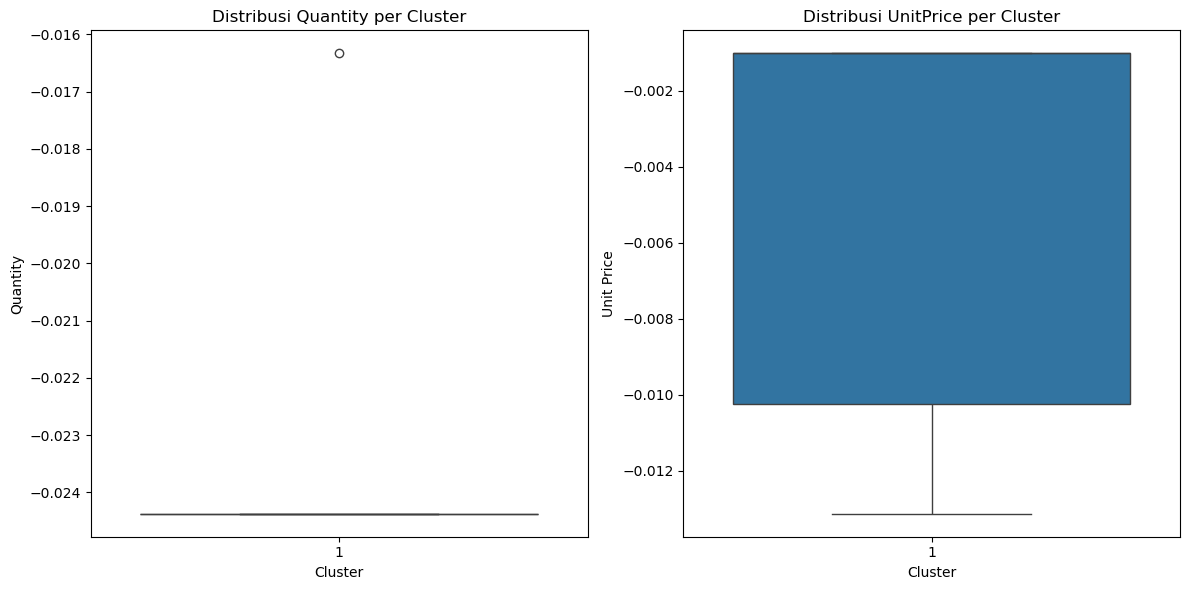

In [82]:

# Load hasil clustering
df_clustered = pd.read_csv("hasil_clustering_numerik.csv")

# Hitung total data dan jumlah cluster yang ada
total_rows = len(df_clustered)
existing_clusters = sorted(df_clustered['Cluster'].unique())

# Hitung jumlah dan persentase tiap cluster
cluster_sizes = df_clustered['Cluster'].value_counts()
cluster_percentages = {k: round((v / total_rows * 100), 2) for k, v in cluster_sizes.items()}

# 1. Distribusi cluster dalam tabel
distribusi_cluster = pd.DataFrame({
    "Cluster": [f"Cluster {i}" for i in existing_clusters],
    "Jumlah Data": [cluster_sizes[i] for i in existing_clusters],
    "Persentase": [f"{cluster_percentages[i]}%" for i in existing_clusters]
})

print("\n===== DISTRIBUSI UKURAN CLUSTER =====\n")
print(tabulate(distribusi_cluster, headers="keys", tablefmt="grid"))

# 2. Analisis statistik per cluster
cluster_analysis = df_clustered.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'min', 'max', 'count'],
    'UnitPrice': ['mean', 'median', 'min', 'max'],
    'CustomerID': ['nunique']
}).round(2)

print("\n===== KARAKTERISTIK STATISTIK PER CLUSTER =====\n")
print(tabulate(cluster_analysis, headers="keys", tablefmt="grid"))

# 3. Distribusi negara per cluster (persentase)
country_distribution = pd.crosstab(df_clustered['Cluster'], df_clustered['Country'], normalize='index') * 100
country_distribution = country_distribution.round(2)

print("\n===== DISTRIBUSI NEGARA PER CLUSTER (%) =====\n")
print(tabulate(country_distribution, headers="keys", tablefmt="grid"))

# 4. Simpan hasil ke dalam file CSV
distribusi_cluster.to_csv("distribusi_cluster.csv", index=False)
cluster_analysis.to_csv("statistik_per_cluster.csv")
country_distribution.to_csv("distribusi_negara_per_cluster.csv")

print("\n✅ Data berhasil disimpan sebagai CSV:")
print("- distribusi_cluster.csv")
print("- statistik_per_cluster.csv")
print("- distribusi_negara_per_cluster.csv")

# 5. Visualisasi dengan boxplot
plt.figure(figsize=(12, 6))

# Boxplot Quantity per Cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Quantity', data=df_clustered)
plt.title('Distribusi Quantity per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity')

# Boxplot UnitPrice per Cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='UnitPrice', data=df_clustered)
plt.title('Distribusi UnitPrice per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Unit Price')

plt.tight_layout()
plt.show()